### Looping Ontario Warehouse Map

One of the best ways to explore how Ontario has changed because of warehouses is plot them in a loop over time.

In [33]:
#import the necessary libraries and data sets

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as mplt
import folium 
import contextily as ctx
from shapely import wkt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#EJIdata3=pd.read_csv('../Data/EJI Variables and Warehouse Marked.csv')
#EJIdata3['geometry'] = EJIdata3['geometry'].apply(wkt.loads)
#EJIdata3 = gpd.GeoDataFrame(EJIdata3, geometry='geometry', crs="EPSG:4326")
#airports=gpd.read_file('../Data/Airport_Schools_Parks_Location/Airport_Boundaries_Ontario.geojson')
#parks=gpd.read_file('../Data/Airport_Schools_Parks_Location/CPAD_Shapes/CPAD_2022b_Holdings.shp')
#schools=gpd.read_file('../Data/Airport_Schools_Parks_Location/California_Schools_2021-22_San Berdarnido.geojson')


Warehouses = pd.read_csv('../weekly tasks/week 4/Warehouse Data Exploration - Matthews/Data/Warehouse_Data.csv',
        dtype=
        {
            'Assessor parcel number':str,
            'Building classification':str,
        }
)
San_Bern_Parcels = gpd.read_file('../weekly tasks/week 4/Warehouse Data Exploration - Matthews/Data/Ontario Parcels/SBCo_Parcel_Polygons.shp')

San_Bern_Parcels.rename(columns = {'ParcelNumb':'Assessor parcel number'}, inplace = True)

#merge the warehouses and parcel shapefile on the San Bernandino County Tax Assessor parcel Number
Warehouse_Parcel=Warehouses.merge(San_Bern_Parcels,on="Assessor parcel number")
Warehouse_Parcel_Geo = gpd.GeoDataFrame(Warehouse_Parcel, geometry='geometry', crs="EPSG:4326")


xylim = Warehouse_Parcel_Geo.geometry.total_bounds
xlim = ([xylim[0],  xylim[2]])
ylim = ([xylim[1],  xylim[3]])



### Preparing the For loop

To get ready to producing a looping image of the warehouses in ontario by the decades. To make it graphically pleasing, we'll sort the year each warehouse was built by decade.

In [34]:
Decades = [1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020]

def categorise(row): 
    for Decade in Decades:
        #print(Decade)
        if row['Year built'] >= Decade and row['Year built'] <= Decade+9:
            return Decade
    return 'N/A'

Warehouse_Parcel_Geo['Decade Built'] = Warehouse_Parcel_Geo.apply(lambda row: categorise(row), axis=1)
Warehouse_Parcel_Geo.head(2)

    

Assessor parcel number             Building classification  Year built  \
0              023812175              distribution warehouse        1996   
1              021126319  transit warehouse (truck terminal)        1992   

   Acres  Building sq.ft.  OBJECTID                     OwnerName   LandValue  \
0     93          2646053    157685  TOYOTA MOTOR SALES U S A INC  51,510,534   
1     70          1986082    123022  UPS WORLDWIDE FORWARDING INC  25,587,357   

   Improvemen PersonalPr ExemptionV HomeOwnerE  Acreage           TaxStatus  \
0  30,864,960          0          0       None    93.45  ASSESSED BY COUNTY   
1  54,634,664          0          0       None    66.66  ASSESSED BY COUNTY   

  TaxRateAre           Zoning       ZoningDesc       Jurisdicti  \
0    0004030  CITY OF ONTARIO  City of Ontario  City of Ontario   
1    0004004  CITY OF ONTARIO  City of Ontario  City of Ontario   

                     Jurisdic_1 BaseYear PageMap  \
0  http://www.ci.ontario.ca.us/     1993  023812   
1  http://www.ci.ontario.ca.us/     1992  021126   

                           AssessDesc  AssessClas     Shape__Are   Shape__Len  \
0              DISTRIBUTION WAREHOUSE  COMMERCIAL  552237.437500  3009.581112   
1  TRANSIT WAREHOUSE (TRUCK TERMINAL)  INDUSTRIAL  414508.363281  2895.298085   

                                            geometry  Decade Built  
0  POLYGON ((-117.55796 34.04799, -117.55689 34.0...          1990  
1  POLYGON ((-117.57896 34.04811, -117.57893 34.0...          1990

### Plotting

Now its time to create a for loop which consistenly generates a map of the warehouses of onario. The legend will help the reader know how old the warehouses are.

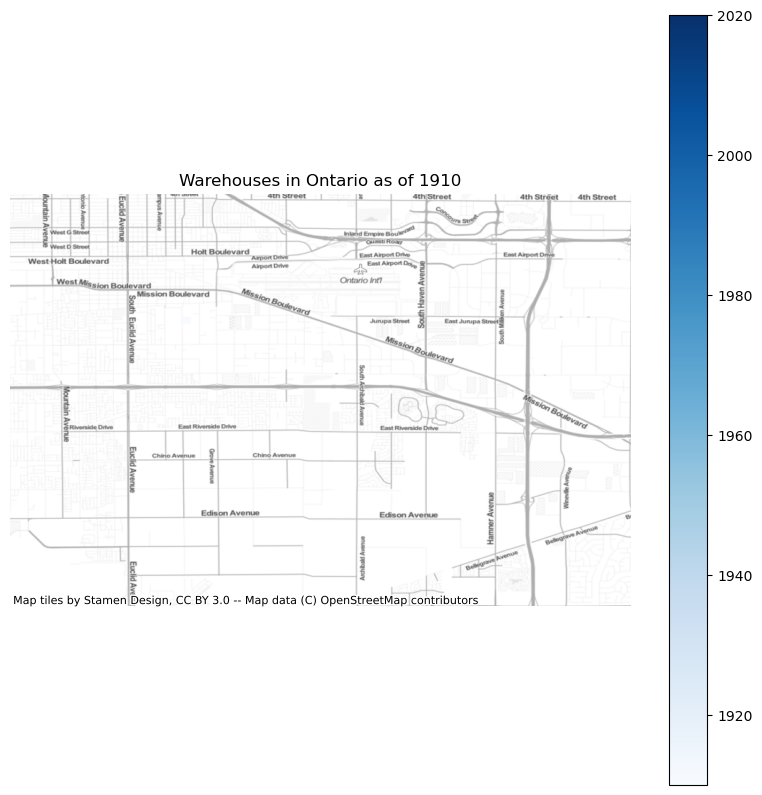

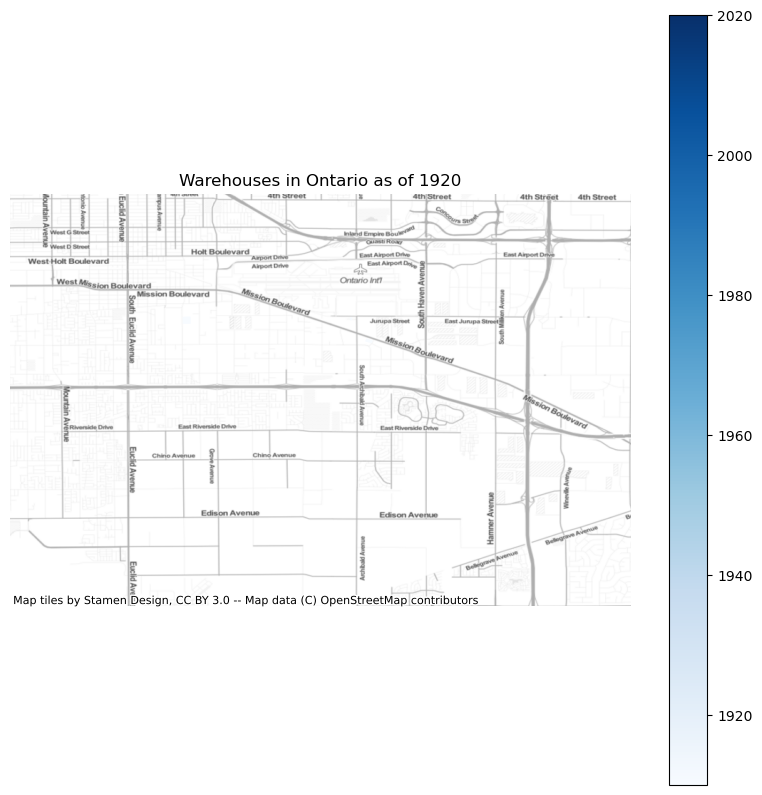

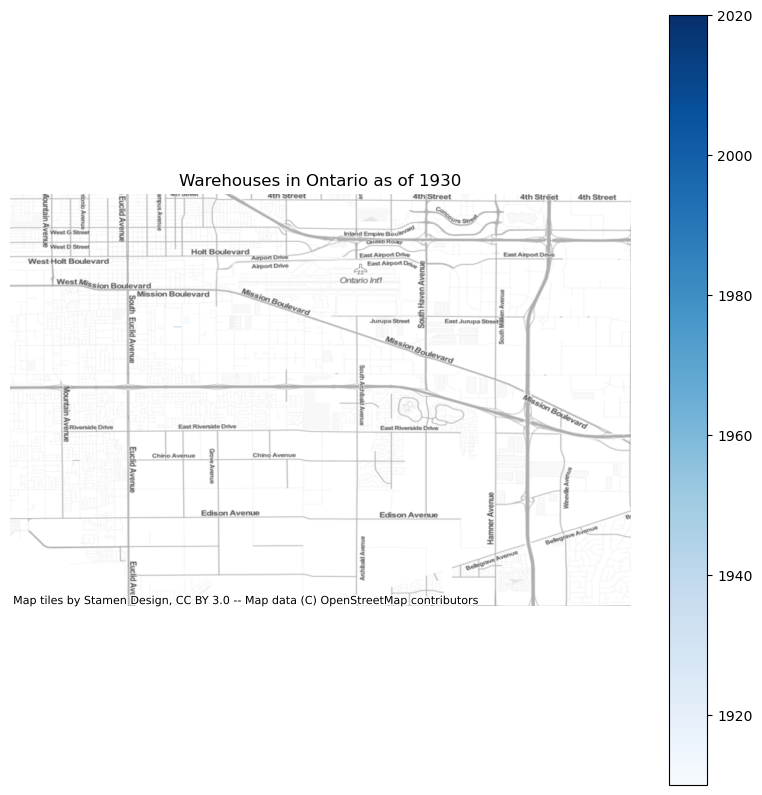

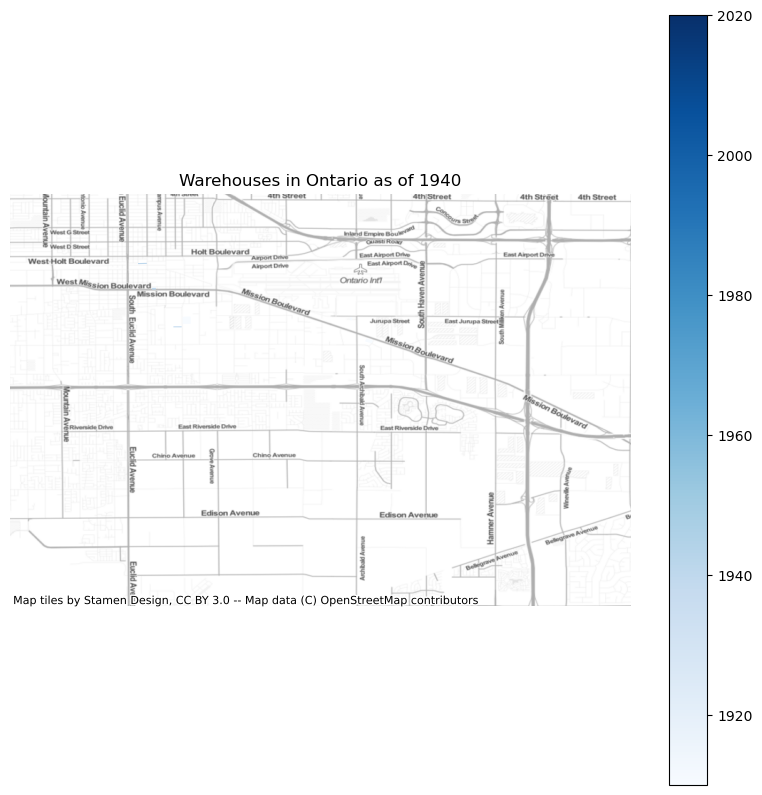

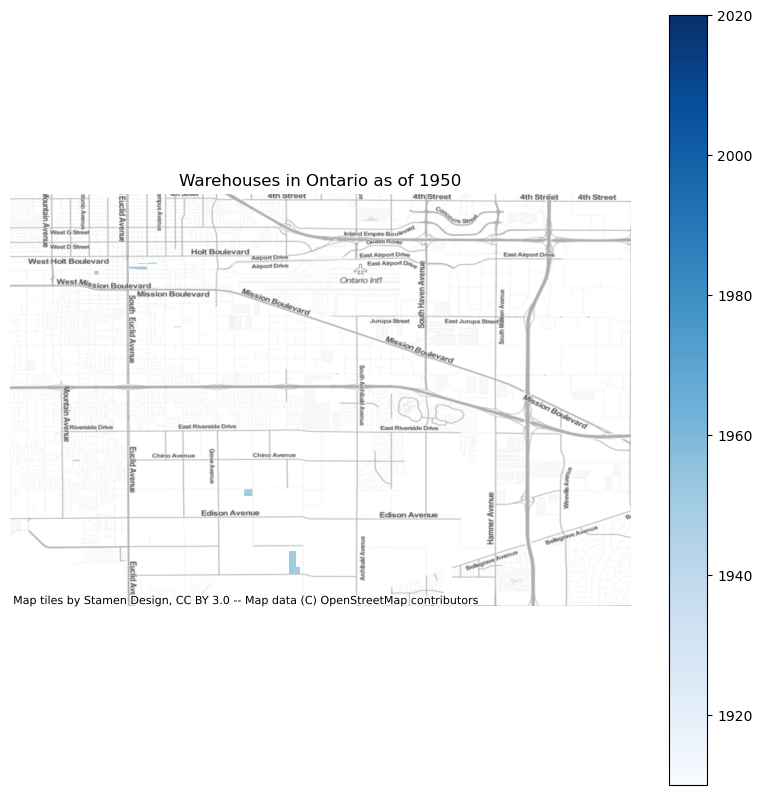

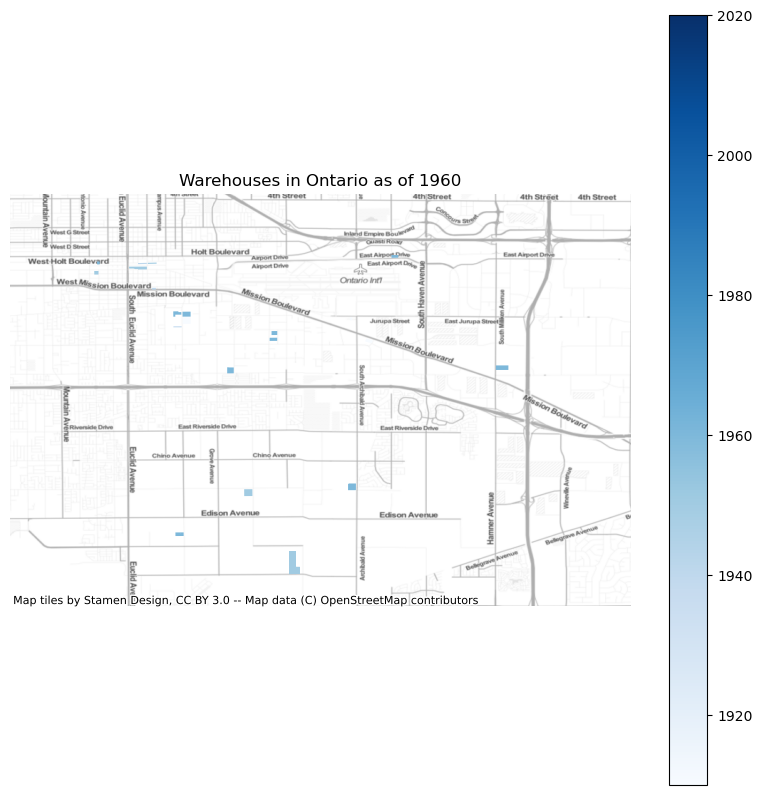

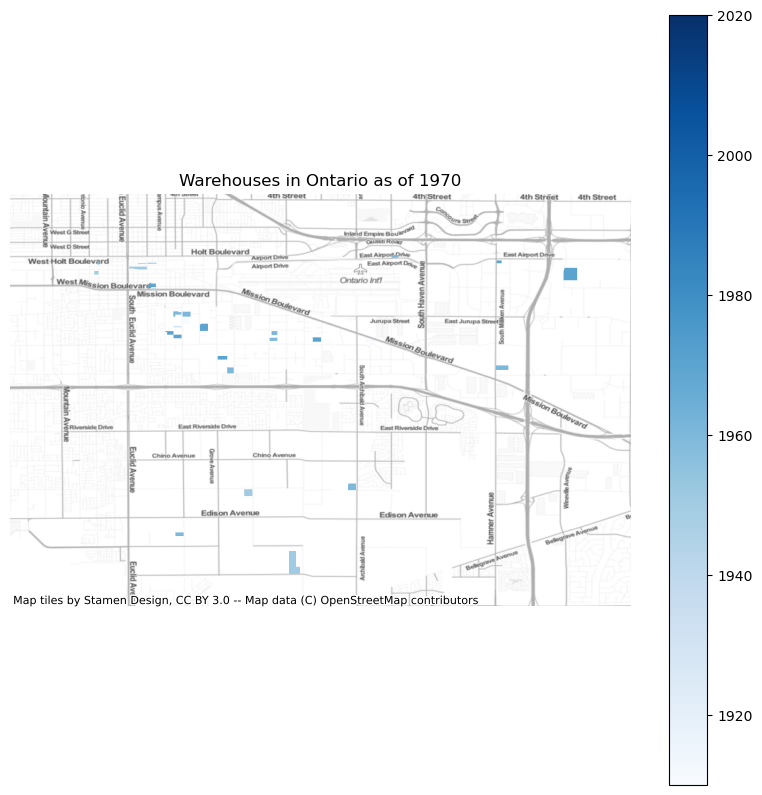

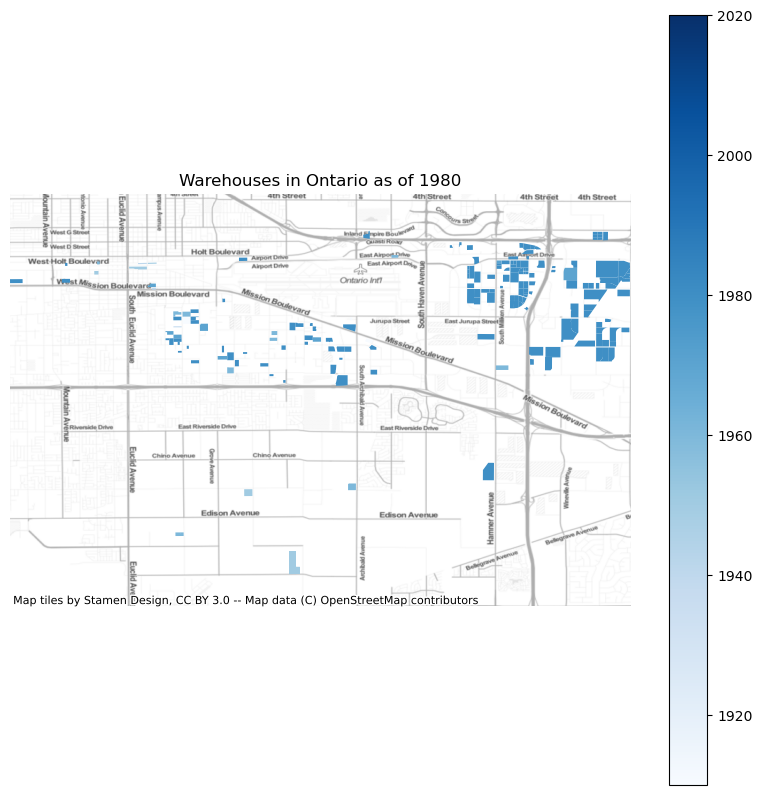

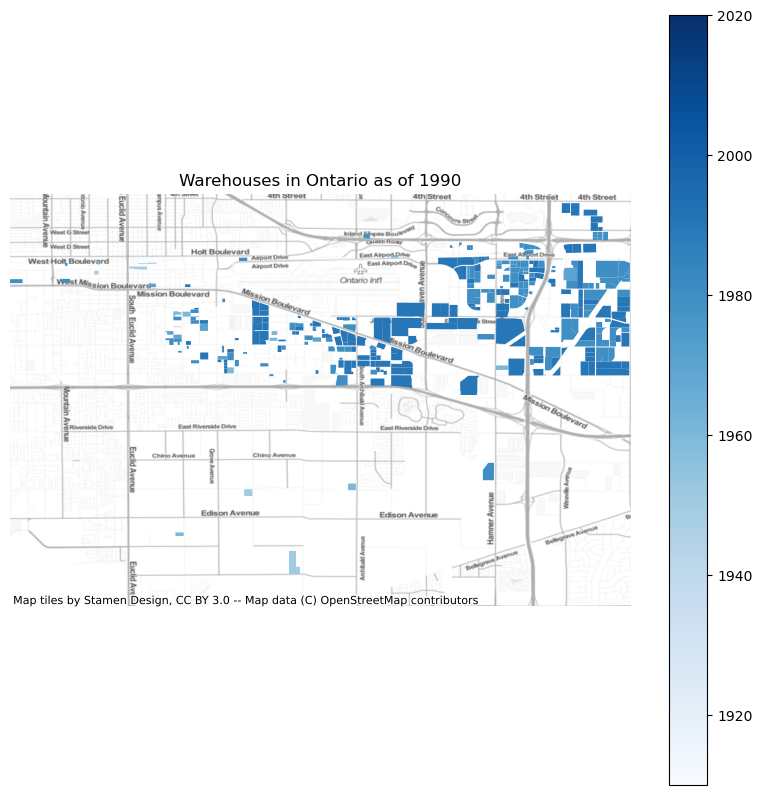

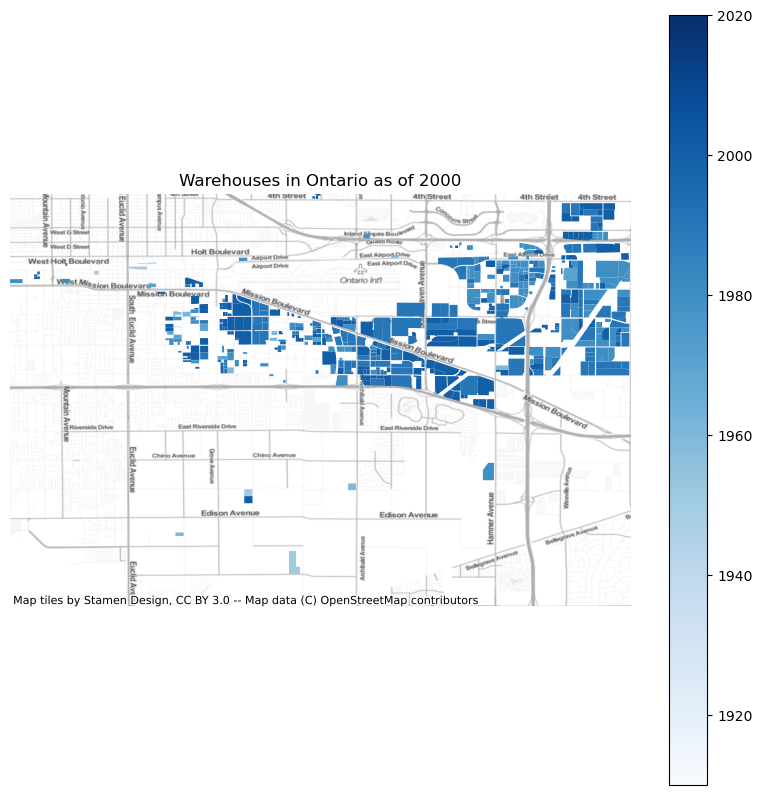

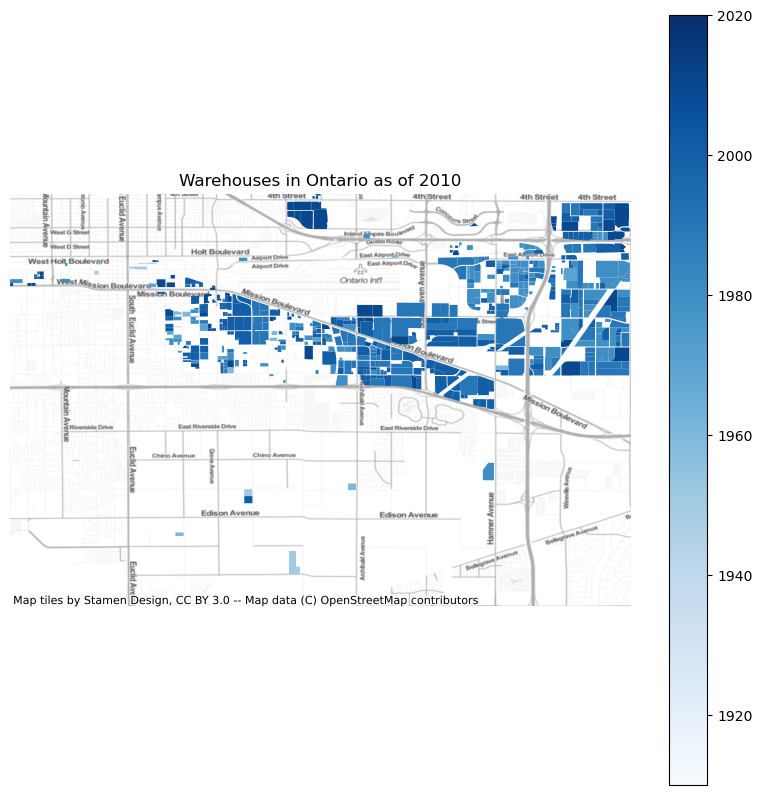

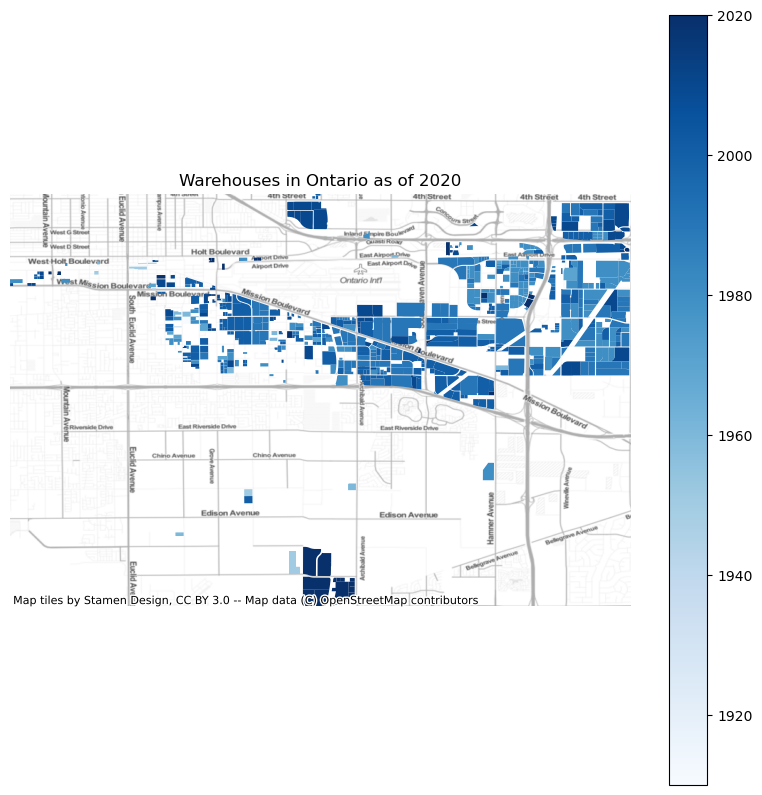

In [35]:
# Make the loop and gif file

from PIL import Image

Decades = [1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020]

for i, Decade in enumerate(Decades):
    Warehouse_Parcel_Geo_plot = Warehouse_Parcel_Geo.loc[Warehouse_Parcel_Geo['Decade Built'] <= Decade]
    fig, ax = mplt.subplots(figsize=(10, 10))
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    Warehouse_Parcel_Geo_plot.plot(column='Decade Built', ax=ax, cmap='Blues', vmin=1910, vmax=2020, legend=True)
    ax.set_axis_off()
    ctx.add_basemap(ax, crs=4326, source = ctx.providers.Stamen.TonerLite,
                    alpha=0.7)
    ax.set_title(f"Warehouses in Ontario as of {Decade}")
    mplt.draw()
    
    # Save plot as PNG file
    mplt.savefig(f"warehouse_{Decade}.png", dpi=300)

In [36]:
# Combine PNG files into animated GIF using Pillow
images = []
for i in range(len(Decades)):
    filename = f"warehouse_{Decade}.png"
    images.append(Image.open(filename))

    # Save the GIF  
images[0].save("Warehouse number growth.gif",format="GIF", append_images=images[1:], save_all=True, duration=300, loop=0)


### Display it!
We have produced several png files and a gif file. Now we just have to display it!  

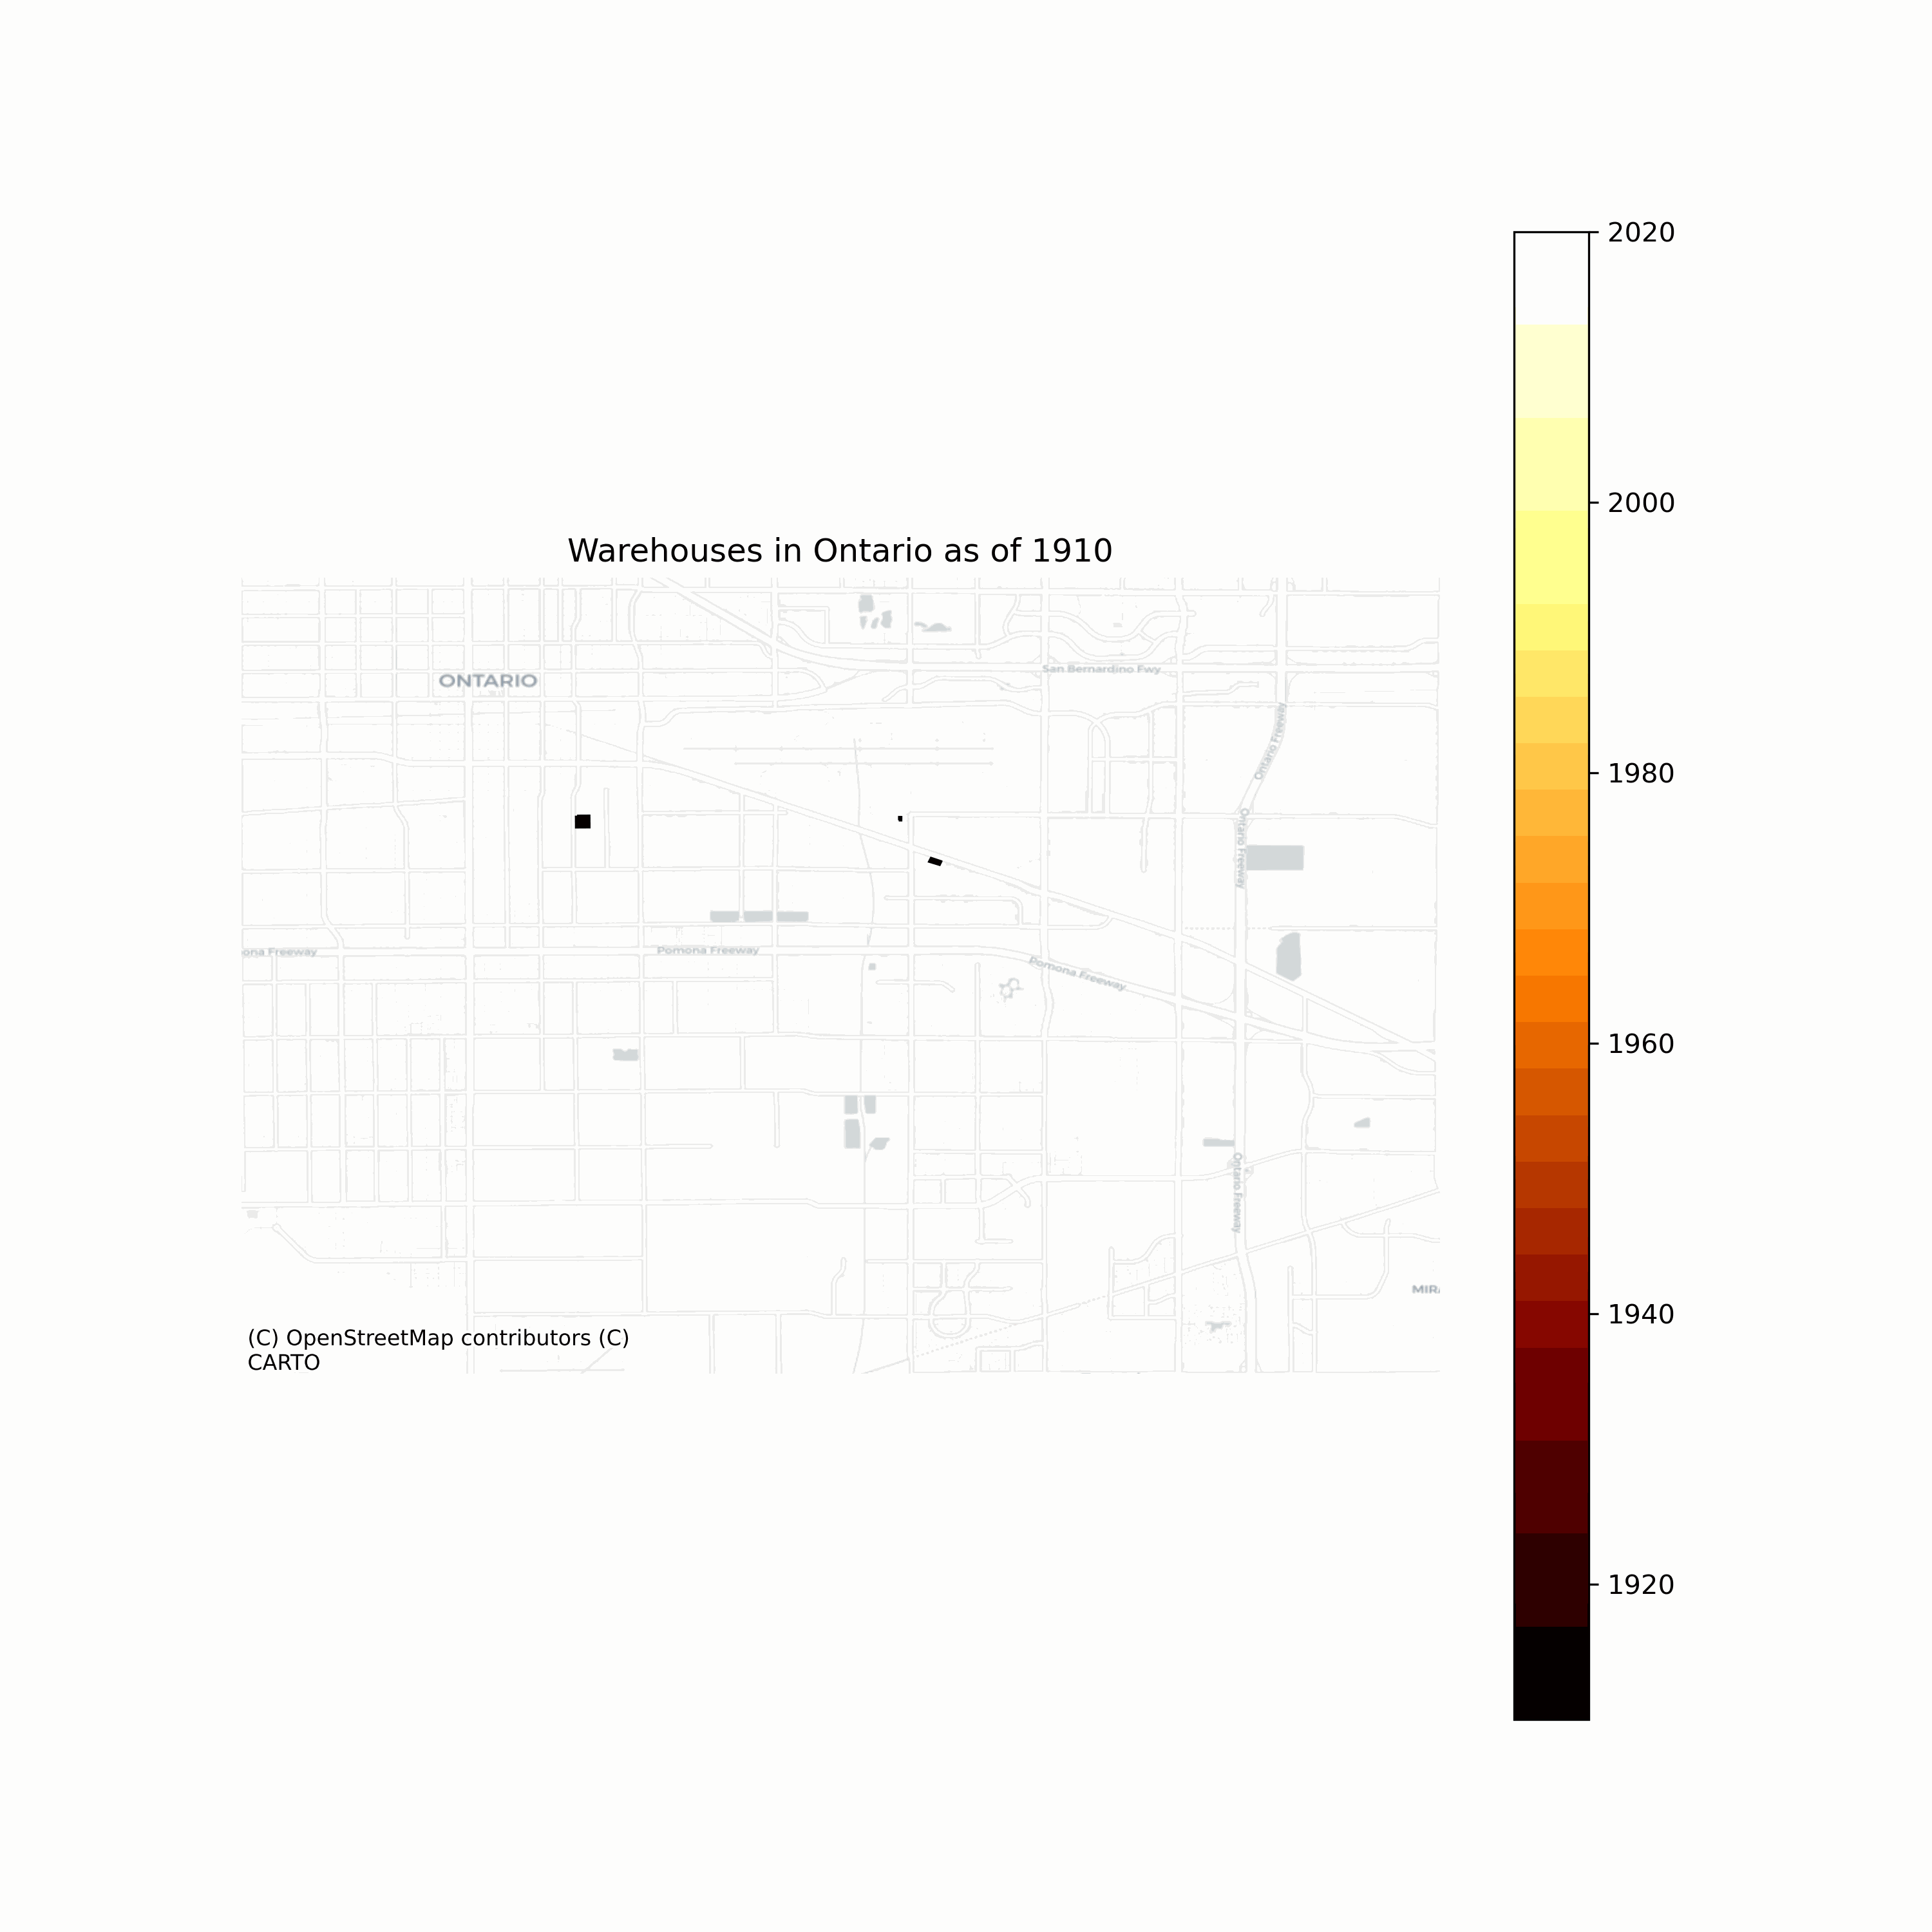

In [39]:
# Display the gif file

from IPython.display import Image
from IPython.display import display

with open("warehouses.gif","rb") as f:
    display(Image(data=f.read(), format='png'))

This is the gif that displays warehouse built in Ontario every decades. It is easy to see that most warehouses were built after 1980.   